In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Read dataset to pandas dataframe
cols = ['class', 'services', 'cost', 'schools', 'police', 'streets', 'events']
dataset = pd.read_csv('SomervilleHappinessSurvey2015.csv', encoding = "utf-16")
dataset.columns = cols
dataset.head()

,class,services,cost,schools,police,streets,events
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]


In [4]:
#Zadatak1:

# podela podataka na trening i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)

In [5]:
# inicijalizacija i obuka klasifikatora
classifier = KNeighborsClassifier(n_neighbors=5, metric='hamming')
classifier.fit(X_train, y_train)
# n_neighbors (default 5)
# weights (uniform, distance or user-defined)
# p (default 2, meaning euclidean, 1 would be manhattan)
# metric (default minkowski, sklearn.neighbors.DistanceMetric (euclidean, manhattan, chebyshev, minkowski, hamming(int), jaccard, dice))
# metric_params 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
# testiranje
y_pred = classifier.predict(X_test) 
conf_mat = confusion_matrix(y_test, y_pred) # TN, FP
print(conf_mat)                             # FN, TP

[[4 3]
 [3 5]]


In [7]:
TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
F_score = 2*precision*sensitivity/(precision+sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('specificity: ', specificity)
print('F score: ', F_score)

precision:  0.625
accuracy:  0.6
sensitivity/recall:  0.625
specificity:  0.5714285714285714
F score:  0.625


In [8]:
# Zadatak2
kf = StratifiedKFold(n_splits=5, shuffle=True)
indexes = kf.split(X, y)
fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
for train_index, test_index in indexes:
    classifier = KNeighborsClassifier(n_neighbors=5, metric='hamming')
    classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index,:])
    conf_mat = confusion_matrix(y.iloc[test_index], y_pred)
    print(conf_mat)
    fin_conf_mat += conf_mat
print('finalna matrica je: ')
print(fin_conf_mat)


[[8 6]
 [7 9]]
[[6 7]
 [8 8]]
[[ 8  5]
 [ 5 10]]
[[ 4  9]
 [ 3 12]]
[[ 4  9]
 [ 3 12]]
finalna matrica je: 
[[30. 36.]
 [26. 51.]]


In [9]:
TP = fin_conf_mat[1, 1]
TN = fin_conf_mat[0, 0]
FP = fin_conf_mat[0, 1]
FN = fin_conf_mat[1, 0]
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
F_score = 2*precision*sensitivity/(precision+sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('specificity: ', specificity)
print('F score: ', F_score)

precision:  0.5862068965517241
accuracy:  0.5664335664335665
sensitivity/recall:  0.6623376623376623
specificity:  0.45454545454545453
F score:  0.6219512195121951


In [10]:
# Zadatak3
# podela trening podataka na trening i validacioni
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10, stratify=y_train)

error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='hamming')
    knn.fit(X_train_1, y_train_1)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Mean Error')

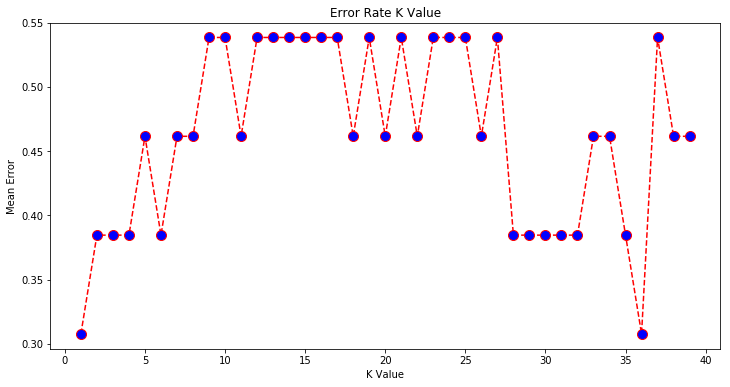

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [12]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(pd.concat([X_train_1, X_val], axis=0), pd.concat([y_train_1, y_val], axis=0))
pred_y = knn.predict(X_test)
conf_mat = confusion_matrix(y.iloc[test_index], y_pred)
print(conf_mat)
TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
F_score = 2*precision*sensitivity/(precision+sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('specificity: ', specificity)
print('F score: ', F_score)

[[ 4  9]
 [ 3 12]]
precision:  0.5714285714285714
accuracy:  0.5714285714285714
sensitivity/recall:  0.8
specificity:  0.3076923076923077
F score:  0.6666666666666666


In [13]:
# Zadatak4
kf = StratifiedKFold(n_splits=5, shuffle=True)
indexes = kf.split(X, y)
fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
for train_index, test_index in indexes:
    classifier = KNeighborsClassifier(n_neighbors=30, metric='hamming')
    classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index,:])
    conf_mat = confusion_matrix(y.iloc[test_index], y_pred)
    print(conf_mat)
    fin_conf_mat += conf_mat
print('finalna matrica je: ')
print(fin_conf_mat)

[[ 3 11]
 [ 2 14]]
[[7 6]
 [9 7]]
[[8 5]
 [7 8]]
[[ 4  9]
 [ 1 14]]
[[ 4  9]
 [ 2 13]]
finalna matrica je: 
[[26. 40.]
 [21. 56.]]


In [14]:
TP = fin_conf_mat[1, 1]
TN = fin_conf_mat[0, 0]
FP = fin_conf_mat[0, 1]
FN = fin_conf_mat[1, 0]
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
F_score = 2*precision*sensitivity/(precision+sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('specificity: ', specificity)
print('F score: ', F_score)

precision:  0.5833333333333334
accuracy:  0.5734265734265734
sensitivity/recall:  0.7272727272727273
specificity:  0.3939393939393939
F score:  0.6473988439306358
